<a href="https://colab.research.google.com/github/ammusin/SCT_ML_TASK02/blob/main/Mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Cluster,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.330000
std,57.879185,13.969007,26.264721,25.823522,1.389516
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,2.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


In [ ]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Applying Inertia to find k value

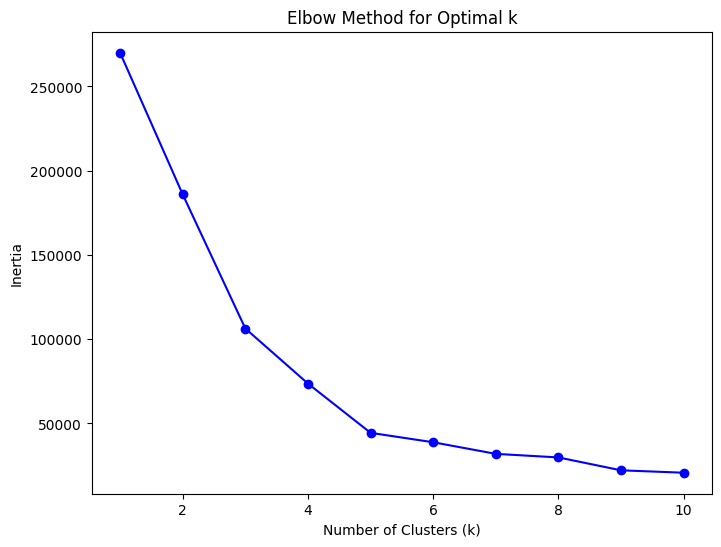

In [ ]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster'] = kmeans.fit_predict(X)


In [ ]:
display(data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


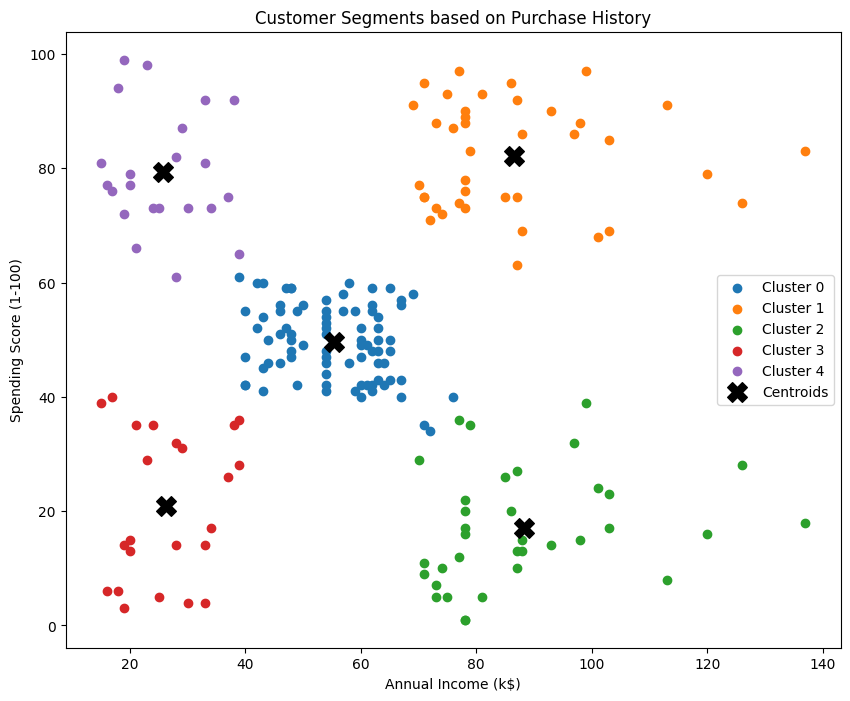

In [ ]:
plt.figure(figsize=(10, 8))
for cluster in range(5):
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(clustered_data['Annual Income (k$)'],
                clustered_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Purchase History')
plt.legend()
plt.show()


In [ ]:
# Save Elbow plot
plt.savefig("elbow_plot.png")

# Save Cluster plot
plt.savefig("cluster_plot.png")


<Figure size 640x480 with 0 Axes>